In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support, make_scorer, fbeta_score, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
wine_df = pd.read_csv('input/winequality-red.csv',delimiter=';')

EDA

In [3]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
wine_df.shape

(1599, 12)

In [6]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
#Check missing values, no missing values
wine_df.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [8]:
#no missing values, our dataset are clean

In [9]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: xlabel='quality', ylabel='count'>

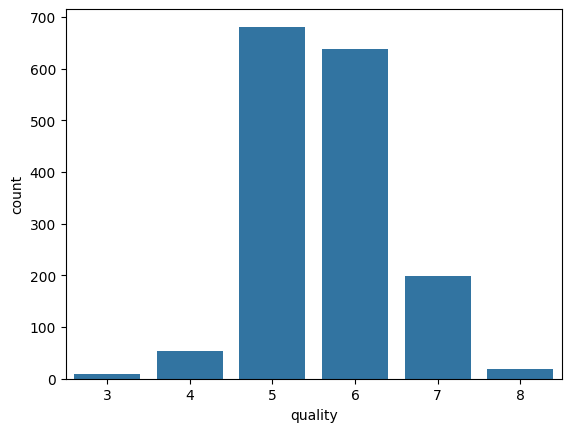

In [10]:
sns.countplot(data=wine_df,x='quality')

<Axes: xlabel='quality', ylabel='percent'>

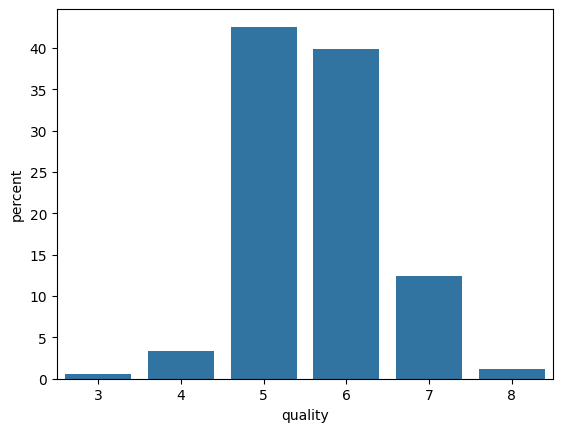

In [11]:
sns.countplot(data=wine_df,x='quality',stat="percent")

Let's define good high quality wine will have score above 6, this will be the threshold

In [12]:
wine_df['hi_quality']= (wine_df.quality > 6).astype('int64')
wine_df['hi_quality'].value_counts()/wine_df['hi_quality'].count()

hi_quality
0    0.86429
1    0.13571
Name: count, dtype: float64

Text(0, 0.5, 'Prcent of Quality Wine')

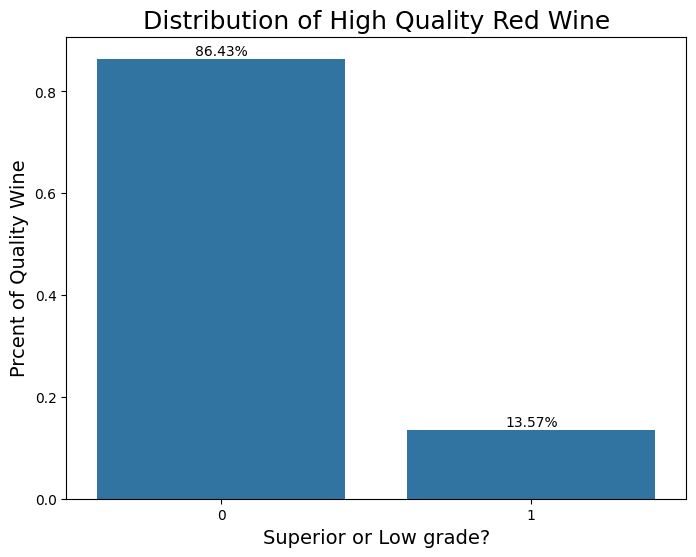

In [13]:
plt.figure(figsize=(8,6))

b=sns.barplot(x=wine_df.hi_quality.value_counts(normalize=True).index, y=wine_df.hi_quality.value_counts(normalize=True))

for p in b.patches:
    b.annotate(f'{p.get_height() * 100:.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
b.axes.set_title("Distribution of High Quality Red Wine",fontsize=18)
b.set_xlabel("Superior or Low grade?",fontsize=14)
b.set_ylabel("Prcent of Quality Wine",fontsize=14)

As can be seen above, only 13.57% of our wines have superior quality. We have an imbalance dataset here

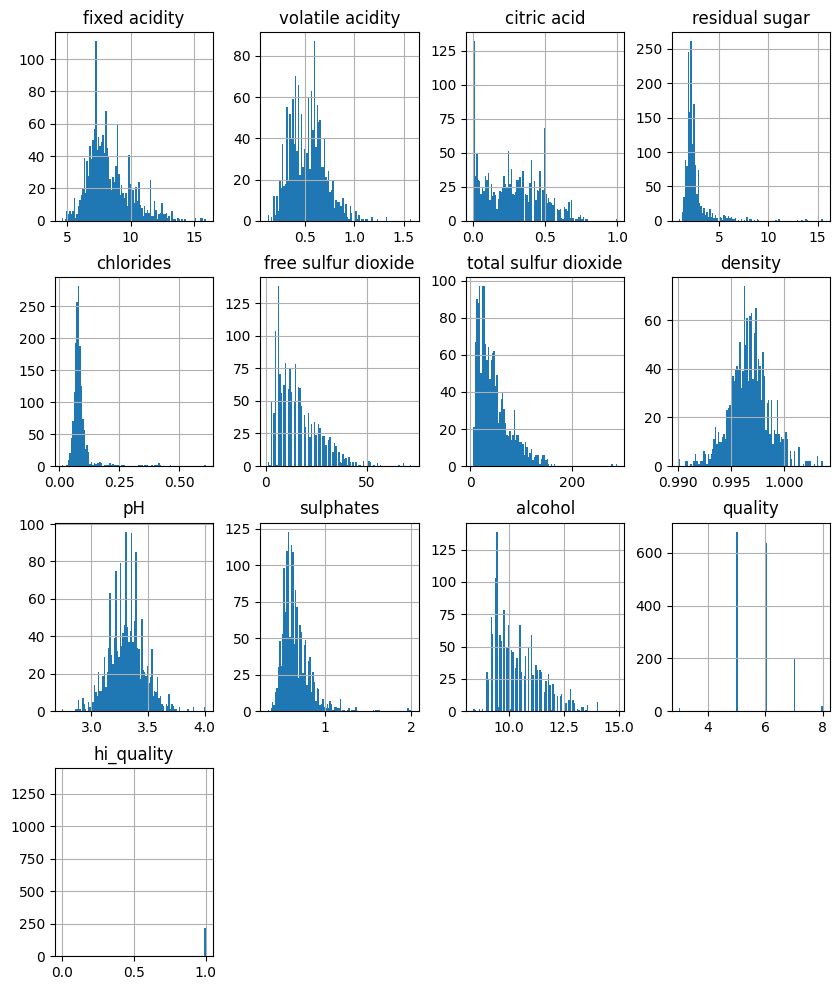

In [14]:
wine_df.hist(bins=100, figsize=(10,12))
plt.show()

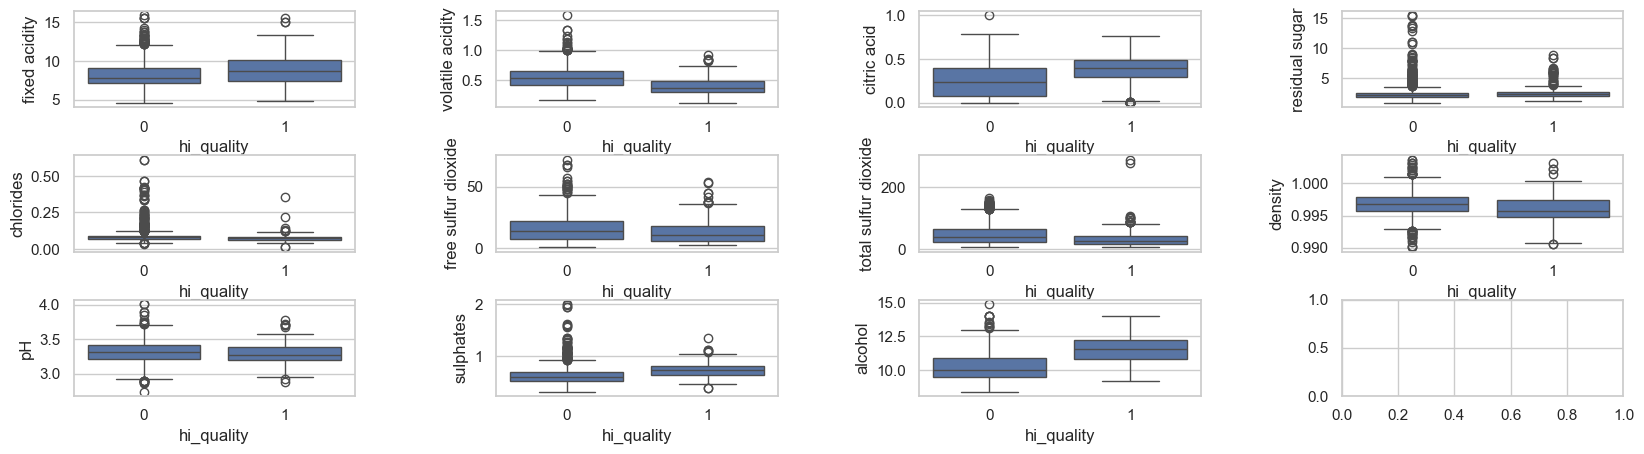

In [43]:
#sns.set(style="whitegrid")

_, ax = plt.subplots(3, 4, figsize=(20, 5))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

#cols = [col for col in wine_df.columns if col != 'hi_quality']
cols = [col for col in wine_df.columns if col not in ['quality', 'hi_quality']]
for i, var in enumerate(cols):
    sns.boxplot(x='hi_quality', y=var, data=wine_df, ax=ax.flatten()[i])
    #ax.set_xlabel("High Quality", fontsize=14)    
    #ax.set_ylabel("Total Bill", fontsize=14)


From the boxplot above we can infer the following relationship: a. Higher alcohol make better wine. High quality wine has about 1.5% more alcohol on average than low quality wine. Most wine in our dataset has alcohol level below 14% b. Lower level of volatile acidity make better wine. Volatile acids, similar to acetic acid, give a sour taste to our wine, degrading its quality. Hence we see a negative correlation here c. Higher citric acid means better wine. I think citric acid give the wine a "fresh" taste, enhancing its flavor. CItric acid is often use as stabilizer in food and beverage d. The more sulphates, the better the wine.

PREPROCESSING:
Our dataset is clean, no duplicate and no missing values
Let's create heatmap to show correlation between features in the dataset

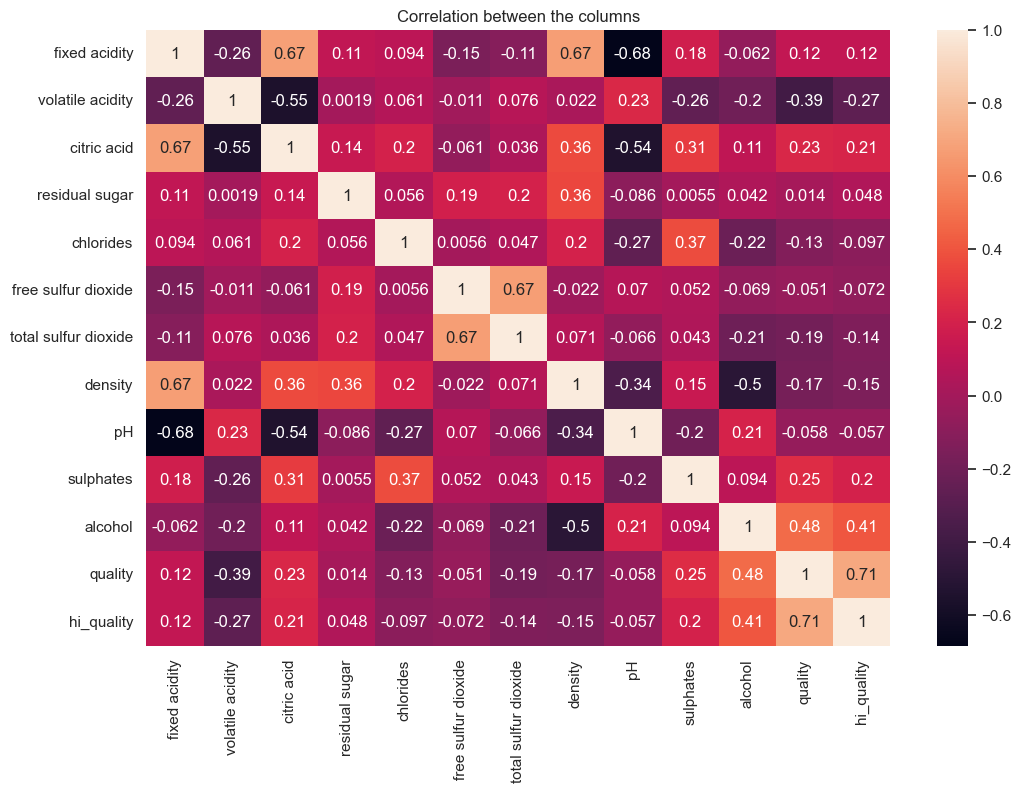

In [44]:
#creat heatmap
plt.figure(figsize=(12,8))
sns.heatmap(wine_df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

Multicollinearity
The heatmap shows that pH and fixed acidity has inverse correlation, as well as citric acid and volatile acidity
Multicollinearity:
There is a strong positive correlation between fixed acidity and density (0.67). But we will leave it as it is. we will not drop any column in this dataset

In [45]:
wine_df.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
hi_quality              0.710196
quality                 1.000000
Name: quality, dtype: float64

we can see alcohol has strong correlation with hi_quality 

This was shown to be statistically significant via a t-test (p-value < .001)
We perform t-test to prove this, The t-test result indicates statistically significant with very small p value (p-value < .001) 

In [46]:
from scipy import stats

group1 = wine_df[wine_df['hi_quality'] == 1]['alcohol'].values
group2 = wine_df[wine_df['hi_quality'] == 0]['alcohol'].values

stats.ttest_ind(group1, group2)

TtestResult(statistic=17.822763607394528, pvalue=6.016774226316707e-65, df=1597.0)

From the boxplot above we can infer the following relationship:
a. Higher alcohol make better wine. 
Most wine in our dataset has alcohol level below 14%
b. Lower level of volatile acidity make better wine. Volatile acids, similar to acetic acid, give a sour taste to our wine, degrading its quality. Hence we see  a negative correlation here
c. Higher citric acid means better wine. I think citric acid give the wine a "fresh" taste, enhancing its flavor. CItric acid is often use as stabilizer in food and beverage
d. The more sulphates, the better the wine.

Scaling: The range of features is not very distinct, but there are some differences. We are going to try several different classification algorithms, including SVM, which requires features to be normalized. We will use sklearn's StandardScaler, which applies a linear transformation to our features such that their mean is zero and their variance is one. We will apply scaling to all classifiers.
We will use standard scaler for this purpose.

Training and Evaluation:
The default scoring for classification is accuracy (correct classification count / total count). However, we are facing a skewed/imbalance classes classification problem, so accuracy may not the best measure. We also have precision, recall, and F1, which are more suitable for this case. 

However, it is good to have a single real number evaluation metric in order to compare different models objectively. We want to be confident that the wine will be of superior quality so the customer will not be disappointed. In this scenario, minimizing false positives (labeling a mediocre wine as high quality) is more important than potentially missing a few good wines (false negatives), which means precision is more important than recall.

However we will not stated that  "no wine is worthy", either, so we will be using a weighted version of F1, fbeta_score. Beta is a parameter that measures how important is recall over precision, where beta=0 means 'consider only precision' and beta=inf means 'consider only recall'.



